In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import wavfile
import librosa
import librosa.display

In [2]:
wav_path="/content/drive/MyDrive/ShipsEar_sample/22__19_07_13_adventure_maniobra.wav"
data, fs = librosa.load(wav_path,sr=52734)
# fs is sampling frequency
# sampling frequency nothing but how may samples present for second.
print(f"Sampling frequency : {fs} and Wave : {data}")

Sampling frequency : 52734 and Wave : [ 0.01812124  0.01844668  0.02082574 ... -0.03603995 -0.03657365
 -0.03704381]


In [3]:
data.shape

(2828835,)

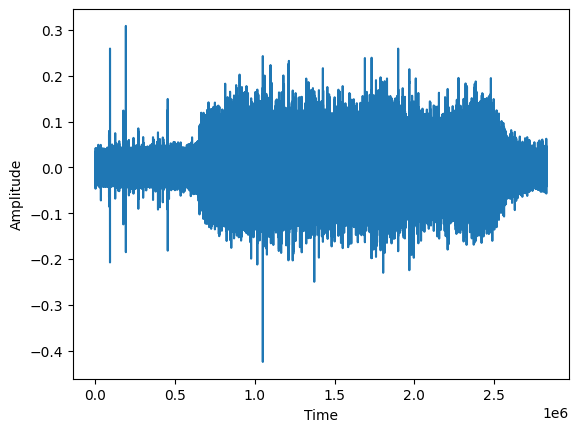

In [4]:
plt.plot(data)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

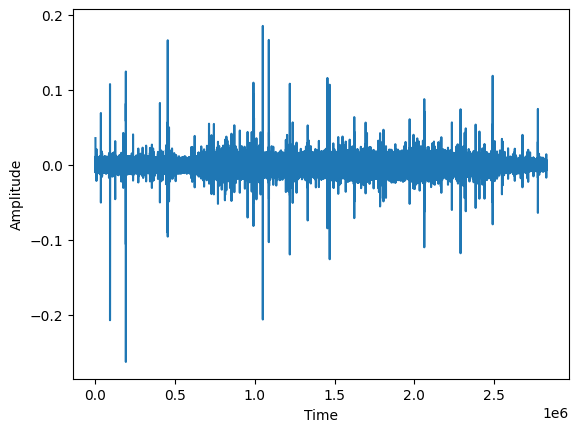

In [5]:
data=librosa.effects.preemphasis(data, coef=0.97)
plt.plot(data)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [6]:
data_stft=librosa.stft(data, n_fft=2048, hop_length=None, win_length=None, window='hann', center=True ,pad_mode='constant')

In [7]:
data_stft.shape

(1025, 5526)

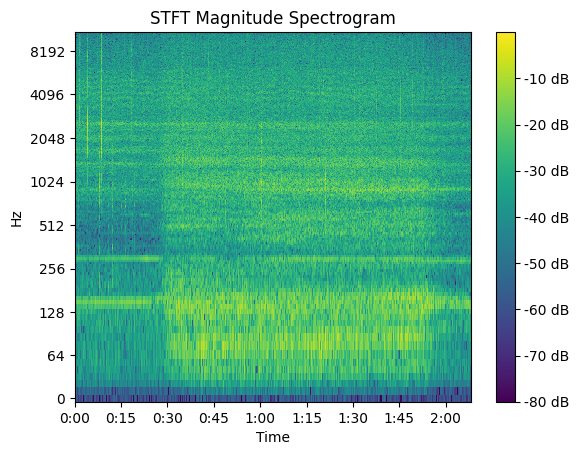

In [8]:
magnitude_spectrogram = np.abs(data_stft)
colormap = plt.get_cmap('viridis')  # You can change 'viridis' to any other colormap name
librosa.display.specshow(librosa.amplitude_to_db(magnitude_spectrogram, ref=np.max), y_axis='log', x_axis='time',cmap=colormap)
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Magnitude Spectrogram')
plt.show()

<ipython-input-16-681fb71af9e0>:2: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(np.abs(D)**2) instead.
  logged_mel_spectrogram=librosa.power_to_db(mel_spectrogram, ref=np.max)


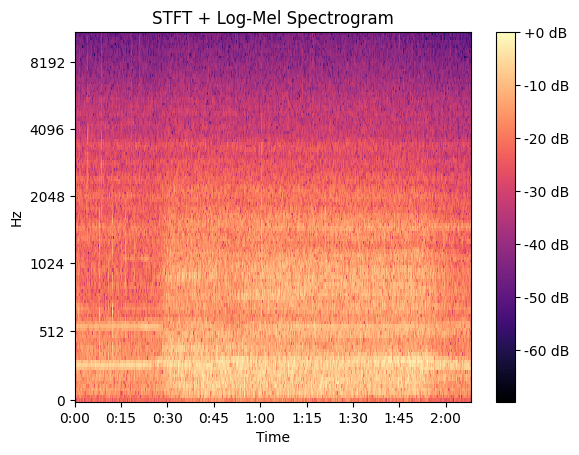

In [16]:
mel_spectrogram = librosa.feature.melspectrogram(S=data_stft, sr=52734)
logged_mel_spectrogram=librosa.power_to_db(mel_spectrogram, ref=np.max)

librosa.display.specshow(logged_mel_spectrogram, y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT + Log-Mel Spectrogram')
plt.show()


In [10]:
logged_mel_spectrogram.shape

(128, 5526)

In [12]:
import librosa.feature

mfccs = librosa.feature.mfcc(y=data, sr=52734, n_mfcc=15, n_fft=2048, hop_length=512)


In [15]:
mfccs

array([[-4.4126056e+02, -4.2346631e+02, -4.2635638e+02, ...,
        -4.4567105e+02, -4.3771695e+02, -4.6415335e+02],
       [-1.4236944e+01, -1.1061872e+01, -1.2145897e+01, ...,
         1.3235009e+00,  3.1669903e+00,  1.8946835e+01],
       [-1.7986874e+01, -2.0344208e+01, -1.9901262e+01, ...,
        -1.0557302e+01, -2.3615775e+00,  1.5924629e+00],
       ...,
       [-4.4760051e-01,  9.9268317e-01, -3.9731581e+00, ...,
        -1.0037387e+01, -1.2338366e+01, -1.7946836e+01],
       [-1.0482841e+00, -9.4902766e-01, -1.2530297e-02, ...,
        -5.5882225e+00,  3.1648523e-01,  9.8431474e-01],
       [-6.9499655e+00, -4.2725201e+00, -2.7010553e+00, ...,
        -5.1681452e+00, -5.7949305e-02,  1.9052675e+00]], dtype=float32)

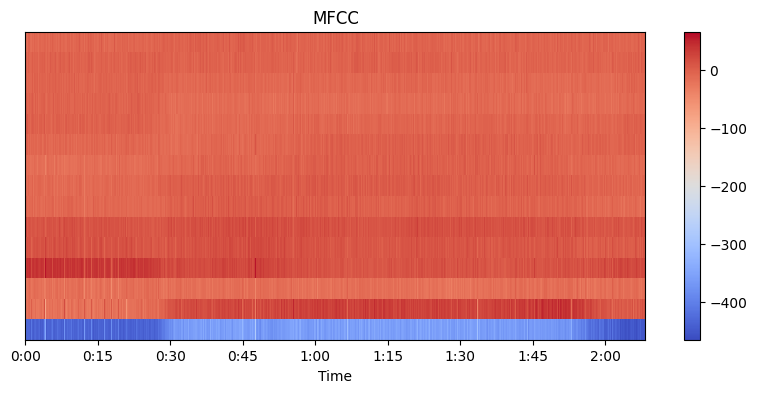

In [13]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.show()


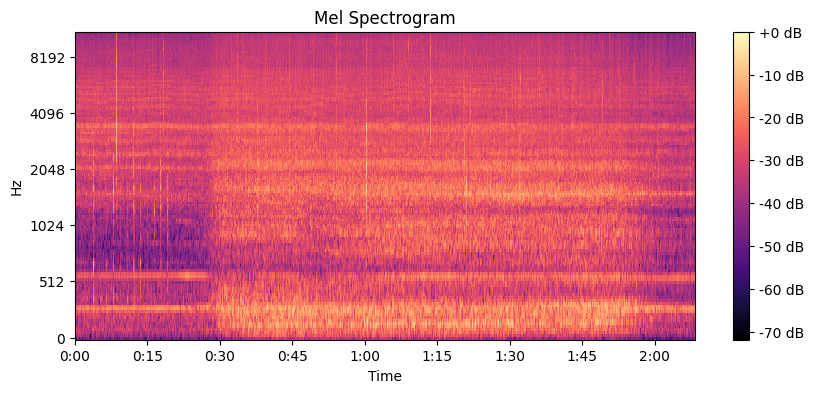

In [14]:
import matplotlib.pyplot as plt
import librosa.display

mel_spectrogram = librosa.feature.melspectrogram(y=data, sr=52734, n_fft=2048, hop_length=512)


plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()
